In [1]:
import numpy as np
import cv2
import os

In [2]:
TRAIN_DIR = './trainData/train/'

In [3]:
train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)]

In [4]:
train_images

['./trainData/train/cat.0.jpg',
 './trainData/train/cat.1.jpg',
 './trainData/train/cat.10.jpg',
 './trainData/train/cat.100.jpg',
 './trainData/train/cat.1000.jpg',
 './trainData/train/cat.10000.jpg',
 './trainData/train/cat.10001.jpg',
 './trainData/train/cat.10002.jpg',
 './trainData/train/cat.10003.jpg',
 './trainData/train/cat.10004.jpg',
 './trainData/train/cat.10005.jpg',
 './trainData/train/cat.10006.jpg',
 './trainData/train/cat.10007.jpg',
 './trainData/train/cat.10008.jpg',
 './trainData/train/cat.10009.jpg',
 './trainData/train/cat.1001.jpg',
 './trainData/train/cat.10010.jpg',
 './trainData/train/cat.10011.jpg',
 './trainData/train/cat.10012.jpg',
 './trainData/train/cat.10013.jpg',
 './trainData/train/cat.10014.jpg',
 './trainData/train/cat.10015.jpg',
 './trainData/train/cat.10016.jpg',
 './trainData/train/cat.10017.jpg',
 './trainData/train/cat.10018.jpg',
 './trainData/train/cat.10019.jpg',
 './trainData/train/cat.1002.jpg',
 './trainData/train/cat.10020.jpg',
 './trai

In [5]:
def read_image_to_grayscale(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    #return img
    return cv2.resize(img, (200, 200),interpolation=cv2.INTER_CUBIC)

In [6]:
def edge_image(image):
    # for better edge detection we first will bulr the image
    img_blur = cv2.GaussianBlur(image, (3,3), 0)
    canny = cv2.Canny(image=img_blur, threshold1=50, threshold2=200)
    return canny
    
    

In [7]:
img = read_image_to_grayscale(train_images[0])
edge = edge_image(img)
img

array([[167, 170, 174, ..., 207, 205, 203],
       [167, 170, 174, ..., 207, 206, 204],
       [167, 170, 174, ..., 208, 207, 205],
       ...,
       [125, 126, 127, ...,   3,   3,   3],
       [124, 124, 126, ...,   2,   2,   2],
       [122, 124, 124, ...,   1,   1,   1]], dtype=uint8)

In [8]:
import matplotlib.pyplot as plt 
def plot(img):
    img = img.reshape((200, 200))
    plt.figure(figsize=(4,2))
    plt.imshow(img, cmap='gray')
    plt.show()

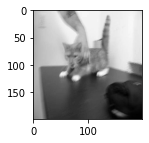

In [9]:
plot(img)

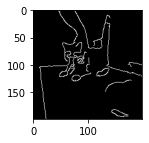

In [10]:
plot(edge)

In [11]:
print(type(edge))

<class 'numpy.ndarray'>


In [12]:
def prep_data(images):
    m = len(images)
    n_x = 200*200
  
    X = np.ndarray((n_x,m), dtype=np.uint8)
    y = np.zeros((1,m))
    print("X.shape is {}".format(X.shape))
  
    for i,image_file in enumerate(images) :
        image = edge_image(read_image_to_grayscale(image_file))
        X[:,i] = np.squeeze(image.reshape((n_x,1)))
        if 'dog' in image_file.lower() :
            y[0,i] = 1
        if 'cat' in image_file.lower() :
            y[0,i] = 0
      
        if i%5000 == 0 :
            print("Proceed {} of {}".format(i, m))
    
    return X,y

In [13]:
data, lable = prep_data(train_images)

X.shape is (40000, 25000)
Proceed 0 of 25000
Proceed 5000 of 25000
Proceed 10000 of 25000
Proceed 15000 of 25000
Proceed 20000 of 25000


In [14]:
import pandas as pd
df = pd.DataFrame(data.T)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,255,0,0,0,0,255,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,255,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
lable_df = pd.DataFrame(lable.T)
lable_df

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
24995,1.0
24996,1.0
24997,1.0
24998,1.0


In [16]:
df['label'] = lable.T

In [17]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,39991,39992,39993,39994,39995,39996,39997,39998,39999,label
24995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
24996,0,0,0,0,0,0,255,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
24997,0,0,0,0,0,0,0,0,0,0,...,255,0,0,255,0,0,255,0,0,1.0
24998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
24999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [18]:
df['label'].value_counts()

0.0    12500
1.0    12500
Name: label, dtype: int64

# Training

In [19]:
from sklearn.model_selection import train_test_split

data = df.drop(['label'],axis = 1)
lable = df['label']

x_train, x_test, y_train, y_test = train_test_split(data, lable, test_size=0.3, random_state=0)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators=50, n_jobs=-1)
clf.fit(x_train,y_train)
prediction = clf.predict(x_test)
accuracy_score(y_test, prediction)

0.5813333333333334

In [21]:
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'bootstrap': [True, False],'n_estimators': [50, 100], 'max_features': ['auto', 'sqrt', 'log2']},
 ]
clf = RandomForestClassifier(n_jobs=-1)
grid_search = GridSearchCV(clf, param_grid, cv=2, verbose=2)
grid_search.fit(x_train, y_train)
grid_search.best_params_

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] END .bootstrap=True, max_features=auto, n_estimators=50; total time=  28.5s
[CV] END .bootstrap=True, max_features=auto, n_estimators=50; total time=  27.2s
[CV] END bootstrap=True, max_features=auto, n_estimators=100; total time=  40.1s
[CV] END bootstrap=True, max_features=auto, n_estimators=100; total time=  38.9s
[CV] END .bootstrap=True, max_features=sqrt, n_estimators=50; total time=  26.6s
[CV] END .bootstrap=True, max_features=sqrt, n_estimators=50; total time=  26.3s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=100; total time=  41.0s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=100; total time=  37.8s
[CV] END .bootstrap=True, max_features=log2, n_estimators=50; total time=  19.7s
[CV] END .bootstrap=True, max_features=log2, n_estimators=50; total time=  18.8s
[CV] END bootstrap=True, max_features=log2, n_estimators=100; total time=  24.4s
[CV] END bootstrap=True, max_features=log2, n_es

{'bootstrap': False, 'max_features': 'sqrt', 'n_estimators': 100}

In [22]:
grid_search.best_score_

0.5919428571428571

In [23]:
clf = RandomForestClassifier(n_estimators=100, max_features='auto',bootstrap=True, n_jobs=-1)
clf.fit(x_train,y_train)
prediction = clf.predict(x_test)
accuracy_score(y_test, prediction)

0.5924

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

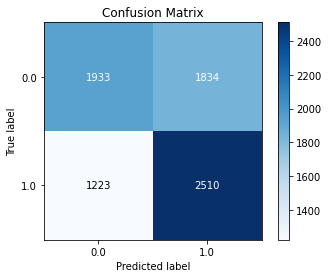

In [24]:
import scikitplot.metrics as skplt
skplt.plot_confusion_matrix(y_test,prediction)

## I see that we didnt manage clasify cat\dog good enught with cany edge detection. Now lets try some other image pre-processing.

In [25]:
from skimage.feature import hog
from skimage import data, exposure

img = read_image_to_grayscale(train_images[0])
print(type(img))
fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16),cells_per_block=(1, 1), visualize=True)

<class 'numpy.ndarray'>


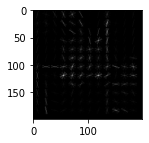

In [26]:
plot(hog_image)

In [27]:
fd

array([0.59446115, 0.34925318, 0.19047861, ..., 0.38006701, 0.38006701,
       0.24667899])

In [28]:
def hog_img(img):
    return hog(img, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True)

In [29]:
def prep_data(images):
    m = len(images)
    n_x = 200*200
  
    X = np.ndarray((n_x,m), dtype=np.uint8)
    y = np.zeros((1,m))
    print("X.shape is {}".format(X.shape))
  
    for i,image_file in enumerate(images) :
        f,image = hog_img(read_image_to_grayscale(image_file))
        X[:,i] = np.squeeze(image.reshape((n_x,1)))
        if 'dog' in image_file.lower() :
            y[0,i] = 1
        elif 'cat' in image_file.lower() :
            y[0,i] = 0
      
        if i%500 == 0 :
            print("Proceed {} of {}".format(i, m))
    
    print('-----------------Finished--------------')
    return X,y

In [30]:
data, lable = prep_data(train_images)

X.shape is (40000, 25000)
Proceed 0 of 25000
Proceed 500 of 25000
Proceed 1000 of 25000
Proceed 1500 of 25000
Proceed 2000 of 25000
Proceed 2500 of 25000
Proceed 3000 of 25000
Proceed 3500 of 25000
Proceed 4000 of 25000
Proceed 4500 of 25000
Proceed 5000 of 25000
Proceed 5500 of 25000
Proceed 6000 of 25000
Proceed 6500 of 25000
Proceed 7000 of 25000
Proceed 7500 of 25000
Proceed 8000 of 25000
Proceed 8500 of 25000
Proceed 9000 of 25000
Proceed 9500 of 25000
Proceed 10000 of 25000
Proceed 10500 of 25000
Proceed 11000 of 25000
Proceed 11500 of 25000
Proceed 12000 of 25000
Proceed 12500 of 25000
Proceed 13000 of 25000
Proceed 13500 of 25000
Proceed 14000 of 25000
Proceed 14500 of 25000
Proceed 15000 of 25000
Proceed 15500 of 25000
Proceed 16000 of 25000
Proceed 16500 of 25000
Proceed 17000 of 25000
Proceed 17500 of 25000
Proceed 18000 of 25000
Proceed 18500 of 25000
Proceed 19000 of 25000
Proceed 19500 of 25000
Proceed 20000 of 25000
Proceed 20500 of 25000
Proceed 21000 of 25000
Proceed 2

In [31]:
import pandas as pd
df = pd.DataFrame(data.T)
lable_df = pd.DataFrame(lable.T)
df['label'] = lable.T
df.tail()


,0,1,2,3,4,5,6,7,8,9,...,39991,39992,39993,39994,39995,39996,39997,39998,39999,label
24995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
24996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
24997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
24998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
24999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [32]:
from sklearn.model_selection import train_test_split

data = df.drop(['label'],axis = 1)
lable = df['label']

x_train, x_test, y_train, y_test = train_test_split(data, lable, test_size=0.3, random_state=0)

In [33]:
clf = RandomForestClassifier(n_estimators=100, max_features='auto',bootstrap=True, n_jobs=-1)
clf.fit(x_train,y_train)
prediction = clf.predict(x_test)
accuracy_score(y_test, prediction)

0.7374666666666667

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

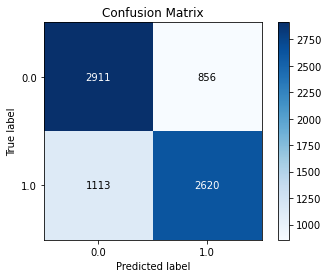

In [34]:
skplt.plot_confusion_matrix(y_test,prediction)

In [35]:
def show_image_prediction(X, model, y) :
    classes = {0: 'cat', 1: 'dog'}
    
    fig, axes = plt.subplots(5, 5, figsize=(10,10))
    for i in range(25):
        idx = np.random.randint(len(X))
        image = X.iloc[idx].to_numpy().reshape(1,-1)
        
        image_class = classes[model.predict(image).item()]
        image = image.reshape((200, 200))
        grid_data = image
        ax = axes[i//5, i%5]
        ax.set_title("[O] {}=? [P] {} ".format(classes[y.iloc[idx]], image_class))
        ax.imshow(grid_data,  cmap='gray')
    plt.tight_layout()

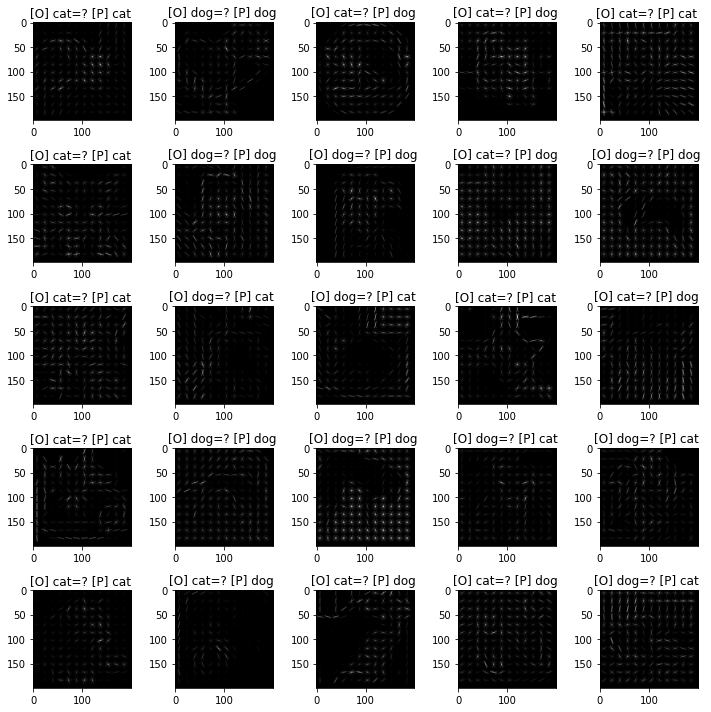

In [36]:
show_image_prediction(x_test, clf, y_test)

# conclusion:

In this notebook we asked to predict if a given image is cat or dog. from the start I expaced that traditional process, of trainig a classifier, on given image will not be acurate enough. so an image pre-processing on the image before the training is nessasery.
I tried 2 pre-processing methods:

    * Canny Edge Detection - this try to recognize the edges in the image. This dosent help us much as the accuracy after that was around 60%.
    
    * Histogram of Oriented Gradients ( HOG ) - This method is detecting edges in small sectors and draw small lines (vectors) inside. it create image of oriented vectors. the accuracy after that was around 75%. 

# Validation

In [38]:
TEST_DIR = './testData/test1/'
test_images = [TEST_DIR+i for i in os.listdir(TEST_DIR)]
test_images

['./testData/test1/1.jpg',
 './testData/test1/10.jpg',
 './testData/test1/100.jpg',
 './testData/test1/1000.jpg',
 './testData/test1/10000.jpg',
 './testData/test1/10001.jpg',
 './testData/test1/10002.jpg',
 './testData/test1/10003.jpg',
 './testData/test1/10004.jpg',
 './testData/test1/10005.jpg',
 './testData/test1/10006.jpg',
 './testData/test1/10007.jpg',
 './testData/test1/10008.jpg',
 './testData/test1/10009.jpg',
 './testData/test1/1001.jpg',
 './testData/test1/10010.jpg',
 './testData/test1/10011.jpg',
 './testData/test1/10012.jpg',
 './testData/test1/10013.jpg',
 './testData/test1/10014.jpg',
 './testData/test1/10015.jpg',
 './testData/test1/10016.jpg',
 './testData/test1/10017.jpg',
 './testData/test1/10018.jpg',
 './testData/test1/10019.jpg',
 './testData/test1/1002.jpg',
 './testData/test1/10020.jpg',
 './testData/test1/10021.jpg',
 './testData/test1/10022.jpg',
 './testData/test1/10023.jpg',
 './testData/test1/10024.jpg',
 './testData/test1/10025.jpg',
 './testData/test1/1

In [39]:
data_test, lable_test = prep_data(test_images[:500])

X.shape is (40000, 500)
Proceed 0 of 500
-----------------Finished--------------


In [40]:
def show_image_prediction_test(X, model, org_list) :
    classes = {0: 'cat', 1: 'dog'}
    r = 10
    c = 5
    fig, axes = plt.subplots(r, c, figsize=(15,15))
    for i in range(r*c):
        idx = np.random.randint(len(X))
        image = X.iloc[idx].to_numpy().reshape(1,-1)
        image_class = classes[model.predict(image).item()]
        image = image.reshape((200, 200))
        grid_data = read_image_to_grayscale(org_list[idx])
        ax = axes[i//c, i%c]
        ax.set_title("[P] {} ".format( image_class))
        ax.imshow(grid_data,  cmap='gray')
    plt.tight_layout()

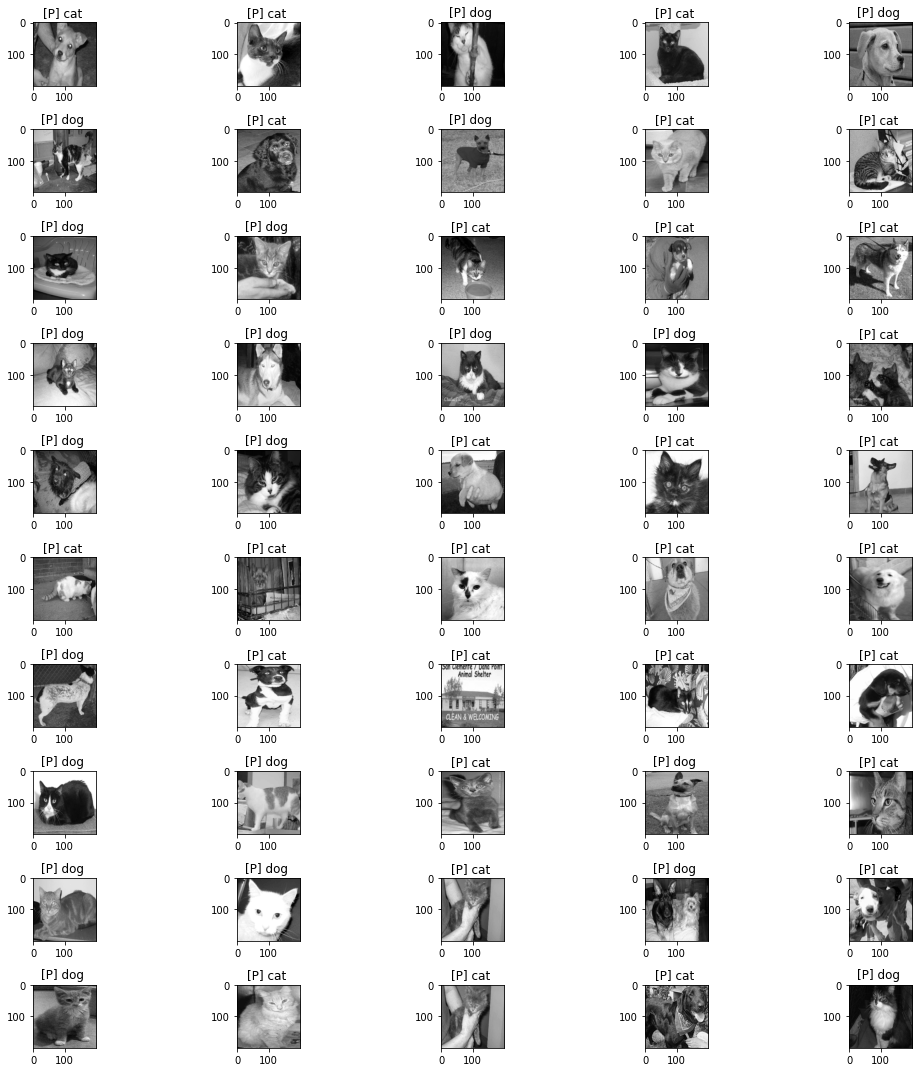

In [41]:
show_image_prediction_test(x_test, clf, test_images)

# PCA
Till now we get accuracy of 0.75 with RandomForest on all features (40000). lets see if when we reduce some features, with PCA, it change our predictions accuracy.

606


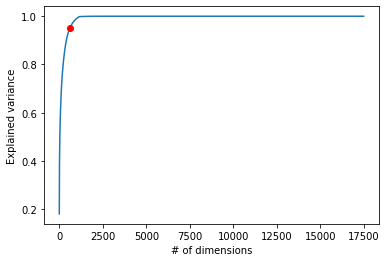

In [42]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print(d)
plt.xlabel('# of dimensions')
plt.ylabel('Explained variance')
plt.plot(cumsum);
plt.plot(d, 0.95, color='red', marker='o');

In [43]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(x_train)
X_test_pca = pca.transform(x_test)
X_train_pca.shape

(17500, 606)

In [44]:
X_test_pca.shape

(7500, 606)

In [45]:
clf = RandomForestClassifier(n_estimators=100, max_features='auto',bootstrap=True, n_jobs=-1)
clf.fit(X_train_pca,y_train)
prediction = clf.predict(X_test_pca)
accuracy_score(y_test, prediction)

0.7388

In [ ]:
skplt.plot_confusion_matrix(y_test,prediction)